In [1]:
import utils
import networks
from plot_utils import plot_summary

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, WeightedRandomSampler

In [2]:
train_set = datasets.ImageFolder(root=utils.dirs['train'], transform=utils.transform['train'])
val_set = datasets.ImageFolder(root=utils.dirs['val'], transform=utils.transform['eval'])

In [3]:
# Weighted Random Sampling for dealing with Imbalanced Dataset
class_freq = torch.as_tensor(train_set.targets).bincount()
weight = 1 / class_freq
samples_weight = weight[train_set.targets]
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

train_dl = DataLoader(train_set, batch_size=32, sampler=sampler, num_workers=2, worker_init_fn=utils.wif)
valid_dl = DataLoader(val_set, batch_size=40)

In [4]:
epochs = 25
criterion = nn.CrossEntropyLoss()

### VGG-16

In [5]:
vgg16 = networks.get_vgg16(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [6]:
utils.fit(
    epochs=epochs,
    model=vgg16,
    criterion=criterion,
    optimizer=optim.Adam(vgg16.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/25]: 100%|██████████| 647/647 [05:33<00:00,  1.94it/s, acc=0.907, loss=0.023]



		Avg train loss: 0.254330	Avg valid loss: 0.140339

		valid_loss decreased (inf -> 0.140339)
		saving model...



Epoch [ 2/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.955, loss=0.00411]



		Avg train loss: 0.126560	Avg valid loss: 0.187394



Epoch [ 3/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.966, loss=0.0118]



		Avg train loss: 0.092556	Avg valid loss: 0.116691

		valid_loss decreased (0.140339 -> 0.116691)
		saving model...



Epoch [ 4/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.973, loss=0.00657]



		Avg train loss: 0.074211	Avg valid loss: 0.147738



Epoch [ 5/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.977, loss=0.0272]



		Avg train loss: 0.069509	Avg valid loss: 0.227921



Epoch [ 6/25]: 100%|██████████| 647/647 [05:43<00:00,  1.88it/s, acc=0.978, loss=0.0189]



		Avg train loss: 0.061550	Avg valid loss: 0.099654

		valid_loss decreased (0.116691 -> 0.099654)
		saving model...



Epoch [ 7/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.982, loss=0.00203]



		Avg train loss: 0.053340	Avg valid loss: 0.072426

		valid_loss decreased (0.099654 -> 0.072426)
		saving model...



Epoch [ 8/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.983, loss=0.0504]



		Avg train loss: 0.049209	Avg valid loss: 0.069702

		valid_loss decreased (0.072426 -> 0.069702)
		saving model...



Epoch [ 9/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.984, loss=0.000371]



		Avg train loss: 0.045026	Avg valid loss: 0.092443



Epoch [10/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.986, loss=0.00133]



		Avg train loss: 0.038855	Avg valid loss: 0.081255



Epoch [11/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.988, loss=0.0513]



		Avg train loss: 0.034456	Avg valid loss: 0.108899



Epoch [12/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.988, loss=0.000829]



		Avg train loss: 0.032593	Avg valid loss: 0.124410



Epoch [13/25]: 100%|██████████| 647/647 [05:42<00:00,  1.89it/s, acc=0.99, loss=0.106]



		Avg train loss: 0.027338	Avg valid loss: 0.127904



Epoch [14/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.991, loss=0.176]



		Avg train loss: 0.027891	Avg valid loss: 0.150402



Epoch [15/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.991, loss=0.00629]



		Avg train loss: 0.024653	Avg valid loss: 0.162245



Epoch [16/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.992, loss=0.00157]



		Avg train loss: 0.022892	Avg valid loss: 0.074296



Epoch [17/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.993, loss=0.00143]



		Avg train loss: 0.020815	Avg valid loss: 0.087141



Epoch [18/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.993, loss=9.49e-5]



		Avg train loss: 0.018561	Avg valid loss: 0.150276



Epoch [19/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.994, loss=0.000332]



		Avg train loss: 0.019155	Avg valid loss: 0.145713



Epoch [20/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.995, loss=0.00904]



		Avg train loss: 0.014722	Avg valid loss: 0.160369



Epoch [21/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.994, loss=0.00185]



		Avg train loss: 0.018671	Avg valid loss: 0.159945



Epoch [22/25]: 100%|██████████| 647/647 [05:41<00:00,  1.90it/s, acc=0.996, loss=0.0317]



		Avg train loss: 0.012245	Avg valid loss: 0.184001



Epoch [23/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.994, loss=6.3e-5]



		Avg train loss: 0.020863	Avg valid loss: 0.193386



Epoch [24/25]: 100%|██████████| 647/647 [05:41<00:00,  1.89it/s, acc=0.995, loss=0.00128]



		Avg train loss: 0.013835	Avg valid loss: 0.204753



Epoch [25/25]: 100%|██████████| 647/647 [05:41<00:00,  1.90it/s, acc=0.994, loss=0.000113]



		Avg train loss: 0.015361	Avg valid loss: 0.141700



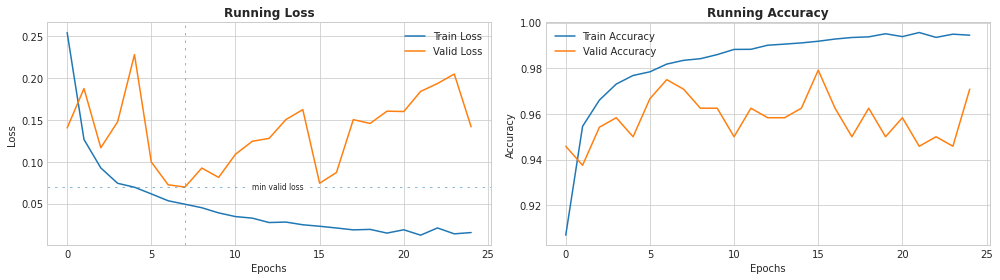

In [7]:
plot_summary('outputs/CSVs/vgg.csv')

### ResNet-18

In [8]:
resnet18 = networks.get_resnet18(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [9]:
utils.fit(
    epochs=epochs,
    model=resnet18,
    criterion=criterion,
    optimizer=optim.Adam(resnet18.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/25]: 100%|██████████| 647/647 [01:33<00:00,  6.92it/s, acc=0.908, loss=0.37]



		Avg train loss: 0.247413	Avg valid loss: 0.198641

		valid_loss decreased (inf -> 0.198641)
		saving model...



Epoch [ 2/25]: 100%|██████████| 647/647 [01:33<00:00,  6.90it/s, acc=0.959, loss=0.011]



		Avg train loss: 0.119524	Avg valid loss: 0.112521

		valid_loss decreased (0.198641 -> 0.112521)
		saving model...



Epoch [ 3/25]: 100%|██████████| 647/647 [01:33<00:00,  6.91it/s, acc=0.971, loss=0.0196]



		Avg train loss: 0.088386	Avg valid loss: 0.140252



Epoch [ 4/25]: 100%|██████████| 647/647 [01:33<00:00,  6.92it/s, acc=0.978, loss=0.0869]



		Avg train loss: 0.068107	Avg valid loss: 0.127430



Epoch [ 5/25]: 100%|██████████| 647/647 [01:34<00:00,  6.86it/s, acc=0.98, loss=0.00709]



		Avg train loss: 0.061315	Avg valid loss: 0.127968



Epoch [ 6/25]: 100%|██████████| 647/647 [01:32<00:00,  7.02it/s, acc=0.984, loss=0.00688]



		Avg train loss: 0.046880	Avg valid loss: 0.140529



Epoch [ 7/25]: 100%|██████████| 647/647 [01:31<00:00,  7.06it/s, acc=0.988, loss=0.0114]



		Avg train loss: 0.040056	Avg valid loss: 0.106084

		valid_loss decreased (0.112521 -> 0.106084)
		saving model...



Epoch [ 8/25]: 100%|██████████| 647/647 [01:31<00:00,  7.07it/s, acc=0.99, loss=0.019]



		Avg train loss: 0.033473	Avg valid loss: 0.147104



Epoch [ 9/25]: 100%|██████████| 647/647 [01:32<00:00,  6.97it/s, acc=0.991, loss=0.073]



		Avg train loss: 0.028892	Avg valid loss: 0.077828

		valid_loss decreased (0.106084 -> 0.077828)
		saving model...



Epoch [10/25]: 100%|██████████| 647/647 [01:32<00:00,  6.99it/s, acc=0.993, loss=0.00731]



		Avg train loss: 0.022069	Avg valid loss: 0.095793



Epoch [11/25]: 100%|██████████| 647/647 [01:32<00:00,  6.98it/s, acc=0.993, loss=0.00347]



		Avg train loss: 0.020902	Avg valid loss: 0.083955



Epoch [12/25]: 100%|██████████| 647/647 [01:32<00:00,  6.98it/s, acc=0.994, loss=0.00428]



		Avg train loss: 0.019239	Avg valid loss: 0.134390



Epoch [13/25]: 100%|██████████| 647/647 [01:32<00:00,  7.00it/s, acc=0.995, loss=0.0319]



		Avg train loss: 0.015736	Avg valid loss: 0.144764



Epoch [14/25]: 100%|██████████| 647/647 [01:32<00:00,  6.99it/s, acc=0.995, loss=0.00158]



		Avg train loss: 0.015375	Avg valid loss: 0.099095



Epoch [15/25]: 100%|██████████| 647/647 [01:32<00:00,  7.02it/s, acc=0.995, loss=0.0236]



		Avg train loss: 0.016558	Avg valid loss: 0.155688



Epoch [16/25]: 100%|██████████| 647/647 [01:32<00:00,  7.00it/s, acc=0.996, loss=0.00115]



		Avg train loss: 0.013085	Avg valid loss: 0.100938



Epoch [17/25]: 100%|██████████| 647/647 [01:32<00:00,  7.02it/s, acc=0.997, loss=0.000496]



		Avg train loss: 0.010050	Avg valid loss: 0.112790



Epoch [18/25]: 100%|██████████| 647/647 [01:32<00:00,  6.99it/s, acc=0.998, loss=0.00175]



		Avg train loss: 0.007794	Avg valid loss: 0.106966



Epoch [19/25]: 100%|██████████| 647/647 [01:32<00:00,  7.02it/s, acc=0.996, loss=0.00638]



		Avg train loss: 0.011099	Avg valid loss: 0.075002

		valid_loss decreased (0.077828 -> 0.075002)
		saving model...



Epoch [20/25]: 100%|██████████| 647/647 [01:31<00:00,  7.04it/s, acc=0.996, loss=0.00043]



		Avg train loss: 0.011808	Avg valid loss: 0.164304



Epoch [21/25]: 100%|██████████| 647/647 [01:34<00:00,  6.85it/s, acc=0.996, loss=0.000462]



		Avg train loss: 0.013112	Avg valid loss: 0.088991



Epoch [22/25]: 100%|██████████| 647/647 [01:33<00:00,  6.95it/s, acc=0.998, loss=3.07e-5]



		Avg train loss: 0.006676	Avg valid loss: 0.102371



Epoch [23/25]: 100%|██████████| 647/647 [01:33<00:00,  6.89it/s, acc=0.997, loss=0.0306]



		Avg train loss: 0.008749	Avg valid loss: 0.141883



Epoch [24/25]: 100%|██████████| 647/647 [01:32<00:00,  6.97it/s, acc=0.998, loss=0.0545]



		Avg train loss: 0.007406	Avg valid loss: 0.178468



Epoch [25/25]: 100%|██████████| 647/647 [01:33<00:00,  6.95it/s, acc=0.998, loss=0.000595]



		Avg train loss: 0.007592	Avg valid loss: 0.120552



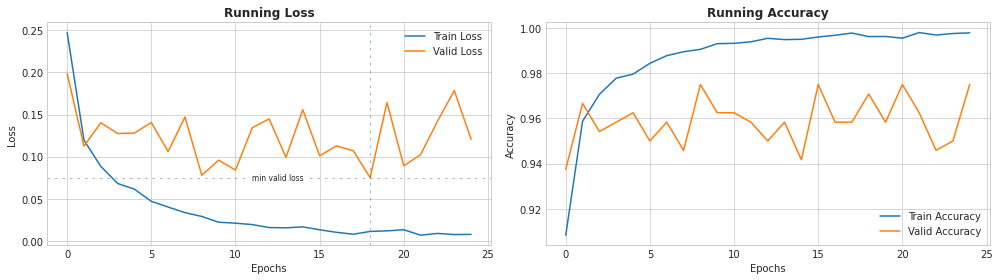

In [10]:
plot_summary('outputs/CSVs/resnet.csv')

### DenseNet-121

In [11]:
densenet121 = networks.get_densenet121(pretrained=True, out_features=4)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [12]:
utils.fit(
    epochs=epochs,
    model=densenet121,
    criterion=criterion,
    optimizer=optim.Adam(densenet121.parameters(), lr=3e-5),
    train_dl=train_dl,
    valid_dl=valid_dl
)

Epoch [ 1/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.901, loss=0.26]



		Avg train loss: 0.288723	Avg valid loss: 0.187355

		valid_loss decreased (inf -> 0.187355)
		saving model...



Epoch [ 2/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.959, loss=0.112]



		Avg train loss: 0.122695	Avg valid loss: 0.144584

		valid_loss decreased (0.187355 -> 0.144584)
		saving model...



Epoch [ 3/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.97, loss=0.227]



		Avg train loss: 0.090146	Avg valid loss: 0.125367

		valid_loss decreased (0.144584 -> 0.125367)
		saving model...



Epoch [ 4/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.976, loss=0.163]



		Avg train loss: 0.072722	Avg valid loss: 0.126661



Epoch [ 5/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.98, loss=0.00282]



		Avg train loss: 0.064221	Avg valid loss: 0.117544

		valid_loss decreased (0.125367 -> 0.117544)
		saving model...



Epoch [ 6/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.986, loss=0.00575]



		Avg train loss: 0.042977	Avg valid loss: 0.138251



Epoch [ 7/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.986, loss=0.224]



		Avg train loss: 0.041941	Avg valid loss: 0.132365



Epoch [ 8/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.989, loss=0.0084]



		Avg train loss: 0.034838	Avg valid loss: 0.148224



Epoch [ 9/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.992, loss=0.0292]



		Avg train loss: 0.028194	Avg valid loss: 0.160335



Epoch [10/25]: 100%|██████████| 647/647 [04:01<00:00,  2.67it/s, acc=0.992, loss=0.0257]



		Avg train loss: 0.025700	Avg valid loss: 0.109081

		valid_loss decreased (0.117544 -> 0.109081)
		saving model...



Epoch [11/25]: 100%|██████████| 647/647 [04:01<00:00,  2.67it/s, acc=0.993, loss=0.00172]



		Avg train loss: 0.022214	Avg valid loss: 0.120966



Epoch [12/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.995, loss=0.0219]



		Avg train loss: 0.017896	Avg valid loss: 0.148889



Epoch [13/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.994, loss=0.0832]



		Avg train loss: 0.019755	Avg valid loss: 0.170685



Epoch [14/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.994, loss=0.00536]



		Avg train loss: 0.017911	Avg valid loss: 0.168353



Epoch [15/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.00297]



		Avg train loss: 0.012219	Avg valid loss: 0.153680



Epoch [16/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.995, loss=0.00517]



		Avg train loss: 0.014022	Avg valid loss: 0.122987



Epoch [17/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.000985]



		Avg train loss: 0.011512	Avg valid loss: 0.130220



Epoch [18/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.996, loss=0.007]



		Avg train loss: 0.011904	Avg valid loss: 0.223744



Epoch [19/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.00277]



		Avg train loss: 0.011162	Avg valid loss: 0.140385



Epoch [20/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.996, loss=0.00298]



		Avg train loss: 0.011199	Avg valid loss: 0.158691



Epoch [21/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.998, loss=0.00144]



		Avg train loss: 0.008453	Avg valid loss: 0.176801



Epoch [22/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.00101]



		Avg train loss: 0.010466	Avg valid loss: 0.186274



Epoch [23/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.00132]



		Avg train loss: 0.008886	Avg valid loss: 0.137501



Epoch [24/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.000452]



		Avg train loss: 0.009949	Avg valid loss: 0.109754



Epoch [25/25]: 100%|██████████| 647/647 [04:01<00:00,  2.68it/s, acc=0.997, loss=0.00286]



		Avg train loss: 0.009338	Avg valid loss: 0.137126



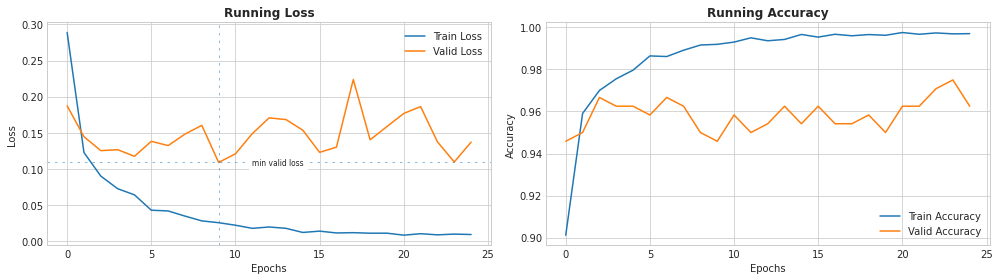

In [13]:
plot_summary('outputs/CSVs/densenet.csv')